In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import sklearn
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline


In [2]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [3]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('\nHere is the R² for the model with few features below:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nHere are the parameter estimates with few features:')
print(origparams)

lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nHere is the R² for the model with many features below:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nHere are the parameter estimates with many features:')
print(origparams)


Here is the R² for the model with few features below:
0.4500625793011847

Here are the parameter estimates with few features:
[-0.         -0.40657726 -0.          0.00114596]

Here is the R² for the model with many features below:
0.44363376712897057

Here are the parameter estimates with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914473


In [5]:
alphas = list(np.arange(.05,1,.05))

ridge_rs = []
lasso_rs = []

for alpha in alphas:
    ridgeregrBig = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    ridge_rs.append(ridgeregrBig.score(X_train2, Y_train))
    lassBig = linear_model.Lasso(alpha=alpha)
    lassBig.fit(X_train2, Y_train)
    lasso_rs.append(lassBig.score(X_train2, Y_train))

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.125420e-18
  overwrite_a=True).T
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.828186e-17
  overwrite_a=True).T
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.746737e-17
  overwrite_a=True).T
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix d

In [6]:
print(alphas)

[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001, 0.9500000000000001]


In [7]:

print(lasso_rs)

[0.5710532985531875, 0.563089493671649, 0.5498169213587836, 0.5312352331355782, 0.5073444290020297, 0.4781445089581413, 0.44363376712897057, 0.4038148555303914, 0.35868681792637636, 0.30824960733096385, 0.2525032378805966, 0.19144674105687842, 0.12508173342426498, 0.05340781434063302, 0.026834134834571755, 0.02683413474903795, 0.026834134657985894, 0.026834134561415365, 0.026834134459326586]


In [8]:

print(ridge_rs)

[0.5739723222458852, 0.5739722663409133, 0.5739721793918757, 0.5739720657072853, 0.57397192902623, 0.5739717725978406, 0.5739715992503313, 0.5739714114491503, 0.5739712113466845, 0.5739710008243177, 0.5739707815282113, 0.5739705549005489, 0.5739703222054038, 0.5739700845517379, 0.5739698429126112, 0.5739695981425982, 0.5739693509920111, 0.5739691021195233, 0.5739688521034456]


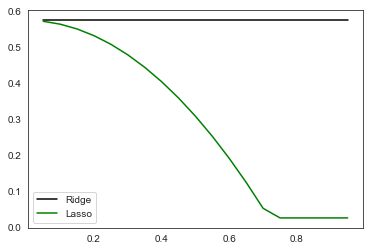

In [9]:
plt.plot(alphas, ridge_rs, c="k", label = 'Ridge')
plt.plot(alphas, lasso_rs, c="g", label = 'Lasso')
plt.legend()
plt.show()

The more that lasso's coefficents decrease to zero, the better chance the regularization will increase. Ridge uses more features than Lasso to project the model.